In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N = 101
t = np.linspace(0,1,N)
y_anal = 

9.281648090109229e-06 99 0.6943941818990023
101


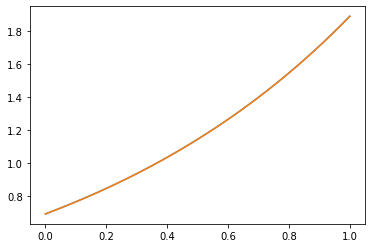

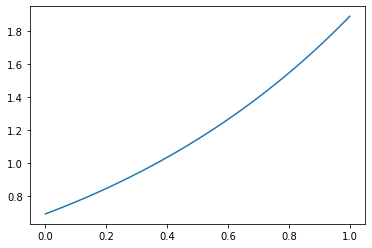

In [25]:
# steepest descent solution of y'=y on [0,1]
# this is done in R^N with inner product
# ( u , v ) = < D0 u , D0 v > + < D1 u , D1 v >

import numpy as np # need numpy arrays
import matplotlib.pyplot as plt # plotting function

import numpy as np

## Tri Diagonal Matrix Algorithm(a.k.a Thomas algorithm) solver
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]

    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    
    return xc
# the infinity norm is a stopping condition for the descent
def mag( vec ) :
    return np.linalg.norm( vec , ord=np.inf )

# number of nodes
N = 101

# step size lambda
step = 0.23 #0.23 works 0.25fails

# set an array of time values for plotting
# also get the internodal spacing
t , delta = np.linspace( start=0.0 , stop=1.0 , num=N , retstep=True )

#set an initial guess for the solution
u = np.linspace( start=1.0 , stop=2.0 , num=N )

#initialize an array for the gradient
DFu = np.linspace( start=1.0 , stop=1.0 , num=N )

# constants used in calculating the Euiclidean gradient
alpha = 2.0/delta + 1.0

beta = 2.0/delta - 1.0

alphaSquared = alpha**2

betaSquared = beta**2

minusAlphaBeta = -alpha * beta

alphaSquaredPlusBetaSquared = alphaSquared + betaSquared


########## the coeffs for the tridiagonal solver
a = np.full( N-1 , -1.0/delta**2 + 0.25 )

b = np.full( N , 2.0/delta**2 + 0.5 )
b[0] = 0.5 * b[0]
b[ N-1 ] = 0.5 * b[N-1]

c = np.full( N-1 , -1.0/delta**2 + 0.25 )




################## begin evolution #####################

stepsTaken = 0

gradNorm = 10.0
while gradNorm >= 0.00001 :
    
    # calculate first element of the gradient
    DFu[ 0 ] = alphaSquared * u[0]  +  minusAlphaBeta * u[1]

    # calculate middle elements of the gradient
    k = 1
    while k <= N-2 :
        DFu[ k ] = minusAlphaBeta * u[k-1] + alphaSquaredPlusBetaSquared * u[k] + minusAlphaBeta * u[k+1]

        k = k + 1

    # calculate last element of the gradient    
    DFu[N-1] = minusAlphaBeta * u[N-2]  +  betaSquared * u[N-1]

    # check magnitude of the gradient
    gradNorm = mag( DFu )

    # find the sobolev gradient
    PDFu = TDMAsolver( a , b , c , DFu )

    # take a minization step
    #u = u - step * DFu  
    u = u - step * PDFu
    #print(t,u,t*u, t*u + 1)
    
    # how many minimization steps so far?
    stepsTaken = stepsTaken + 1

    #print( stepsTaken, gradNorm )

# end of evolution ######################################    

# output
print( gradNorm, stepsTaken , u[0] )
print(np.size(u))

# plot the results vs an exponential function
plt.plot( t , u , t , 0.6942*np.exp(t) )
plt.show()

#plot the gradient
plt.plot( t , u) 
plt.show()

In [66]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# the infinity norm is used in the stopping condition for the descent
def mag( vec ) :
    return np.linalg.norm( vec , ord=np.inf )

# number of nodes
N = 11

# step size lambda
step = 0.0002

# set an array of time values for plotting
# also return the internodal spacing
t , delta = np.linspace( 0.0 , 1.0 , N , retstep=True )

#set an initial guess for the solution
u = np.linspace( start=1.0 , stop=2.0 , num=N )

# constants used in calculating the functional
alpha = 0.5 + 1.0/delta

beta = 0.5 - 1.0/delta

def f( u ): 
    
    sum = 0.0
    
    k = 0 
    while k <= N-2 :
        sum = sum + ( alpha*u[k] + beta*u[k+1] )**2
        k=k+1
        
    return 0.5*sum

Df = grad( f )  ## Df(u) is the gradient of f at u

print( Df(u) )

[ 0.525  1.1    1.2    1.3    1.4    1.5    1.6    1.7    1.8    1.9
 -9.025]


1 9.970444867946071e-06
9.970444867946071e-06 1 nan


C:\Users\Fahad Hassan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Fahad Hassan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in add
  # Remove the CWD from sys.path while we load stuff.


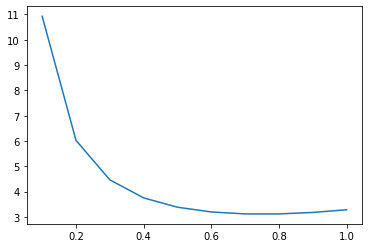

In [68]:
### start the evolution and count the number of optimization steps
stepsTaken = 0

gradNorm = 10.0
while gradNorm >= 0.00001 :
    
      
    # take a minization step
    Df_u = Df( u )
    u = u - step * Df_u  

    gradNorm = mag( Df_u )
    # how many minimization steps so far?
    stepsTaken = stepsTaken + 1

    print( stepsTaken ,  gradNorm )

    
print( gradNorm, stepsTaken , u[0] )

# plot the results vs an exponential function
plt.plot(t , u)
plt.show()